In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import seaborn as sns

from bs4 import BeautifulSoup

## Process files

In [2]:
with open('./residents-subzone-2017.kml', 'r') as f:
    soup = BeautifulSoup(f, 'xml')

In [3]:
placemarks = [placemark for placemark in soup.find_all('Placemark')]

In [4]:
placemarks[0].ExtendedData.SchemaData

<SchemaData schemaUrl="#kml_schema_ft_SUBZONE_DWELLING_TYPE_2017">
<SimpleData name="SUBZONE_N">MARINA SOUTH</SimpleData>
<SimpleData name="PLN_AREA_N">MARINA SOUTH</SimpleData>
<SimpleData name="TOTAL">0</SimpleData>
<SimpleData name="HDB">0</SimpleData>
<SimpleData name="ONE_TO_TWO_RM">0</SimpleData>
<SimpleData name="THREE_RM">0</SimpleData>
<SimpleData name="FOUR_RM">0</SimpleData>
<SimpleData name="FIVE_RM_EXEC_FLATS">0</SimpleData>
<SimpleData name="CONDOS_OTHER_APTS">0</SimpleData>
<SimpleData name="LANDED_PROPERTIES">0</SimpleData>
<SimpleData name="OTHERS">0</SimpleData>
<SimpleData name="INC_CRC">A414A47E5AA4EDB5</SimpleData>
<SimpleData name="FMEL_UPD_D">20170927160941</SimpleData>
</SchemaData>

In [5]:
print(len(placemarks))

323


In [6]:
# reading one datapoint
sample = [
placemarks[0].get('id'),
placemarks[0].snippet,
# placemarks[0].description,
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"SUBZONE_N"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"PLN_AREA_N"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"TOTAL"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"HDB"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"ONE_TO_TWO_RM"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"THREE_RM"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"FOUR_RM"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"FIVE_RM_EXEC_FLATS"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"CONDOS_OTHER_APTS"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"LANDED_PROPERTIES"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"OTHERS"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"INC_CRC"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"FMEL_UPD_D"}),
# [[float(num) for num in pt.split(",")] 
#  for pt in placemarks[26].Polygon.outerBoundaryIs.LinearRing.text.strip().split(" ")],
# [[float(num) for num in pt.split(",")] 
#  for pt in placemarks[26].Polygon.text.strip().replace("\n\n\n\n\n", " ").split(" ")]
]
sample

['kml_1',
 <snippet> </snippet>,
 <SimpleData name="SUBZONE_N">MARINA SOUTH</SimpleData>,
 <SimpleData name="PLN_AREA_N">MARINA SOUTH</SimpleData>,
 <SimpleData name="TOTAL">0</SimpleData>,
 <SimpleData name="HDB">0</SimpleData>,
 <SimpleData name="ONE_TO_TWO_RM">0</SimpleData>,
 <SimpleData name="THREE_RM">0</SimpleData>,
 <SimpleData name="FOUR_RM">0</SimpleData>,
 <SimpleData name="FIVE_RM_EXEC_FLATS">0</SimpleData>,
 <SimpleData name="CONDOS_OTHER_APTS">0</SimpleData>,
 <SimpleData name="LANDED_PROPERTIES">0</SimpleData>,
 <SimpleData name="OTHERS">0</SimpleData>,
 <SimpleData name="INC_CRC">A414A47E5AA4EDB5</SimpleData>,
 <SimpleData name="FMEL_UPD_D">20170927160941</SimpleData>]

In [7]:
# pm.ExtendedData.decompose()
# pm.description.decompose()
# pm.text[14:].strip().split(" ")

In [8]:
placemark_data = []

for placemark in placemarks:
    val_TOTAL = int(placemark.ExtendedData.SchemaData.find("SimpleData", {"name":"TOTAL"}).text)
    val_SUBZONE_N = placemark.ExtendedData.SchemaData.find("SimpleData", {"name":"SUBZONE_N"}).text
    val_PLN_AREA_N = placemark.ExtendedData.SchemaData.find("SimpleData", {"name":"PLN_AREA_N"}).text
    placemark.ExtendedData.decompose()
    placemark.description.decompose()
    placemark_data.append([
        placemark.get('id'),
        val_TOTAL,
        val_SUBZONE_N,
        val_PLN_AREA_N,
#         [[float(num) for num in pt.split(",")] 
#          for pt in placemark.Polygon.text.strip().replace("\n\n\n\n\n", " ").split(" ")]
#         [[float(num) for num in pt.split(",")] 
#          for pt in placemark.Polygon.outerBoundaryIs.LinearRing.text.strip().split(" ")]
#         [[float(num) for num in pt.split(",")] 
#          for pt in placemark.text[14:].strip().replace("\n\n\n\n\n", " ").split(" ")]
        [[[float(num) for num in pt.split(",")] 
          for pt in ring.split(" ")] 
         for ring in placemark.text[14:].strip().split("\n\n\n\n\n")]
    ])

In [9]:
df = pd.DataFrame(placemark_data, columns=["id", "TOTAL", "SUBZONE_N", "PLN_AREA_N", "boundary"])

In [10]:
sum(df["TOTAL"])

3966030

## Calculate the centre of subzone
This is an estimate

In [11]:
def centre_boundary(boundary):
    boundary = sum(row["boundary"], [])  # flatten one level
    x_mean = sum([b[0] for b in boundary])/len(boundary)
    y_mean = sum([b[1] for b in boundary])/len(boundary)
    return x_mean, y_mean

In [12]:
df["x_centre"] = np.nan
df["y_centre"] = np.nan

In [13]:
for index, row in df.iterrows():
    x_mean, y_mean = centre_boundary(row["boundary"])
    df.at[index, "x_centre"] = x_mean
    df.at[index, "y_centre"] = y_mean

In [14]:
df.sample(5)

,id,TOTAL,SUBZONE_N,PLN_AREA_N,boundary,x_centre,y_centre
102,kml_103,48990,BEDOK SOUTH,BEDOK,"[[[103.935413125785, 1.31439213784119, 0.0], [...",103.946969,1.322272
257,kml_258,14510,FLORA DRIVE,PASIR RIS,"[[[103.965136402406, 1.35295405883531, 0.0], [...",103.967651,1.358521
85,kml_86,1480,ORANGE GROVE,NEWTON,"[[[103.833555332241, 1.30892426861334, 0.0], [...",103.829930,1.309160
199,kml_200,0,CHANGI BAY,CHANGI BAY,"[[[104.020757650388, 1.32566479607271, 0.0], [...",104.052358,1.330368
19,kml_20,940,KENT RIDGE,QUEENSTOWN,"[[[103.791381541225, 1.29025694468364, 0.0], [...",103.791615,1.283365


## Display histogram

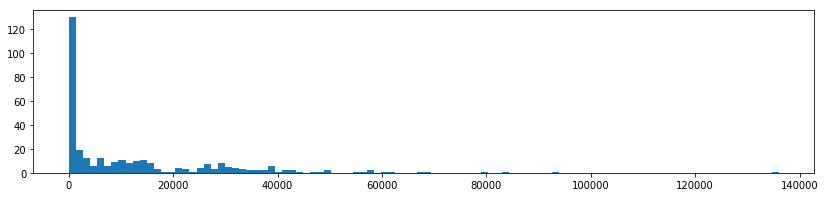

46

In [15]:
plt.figure(figsize=(14,3))
plt.hist(df["TOTAL"], bins=100)
plt.show()
len([x for x in df["TOTAL"] if x > 30000])

## Display map

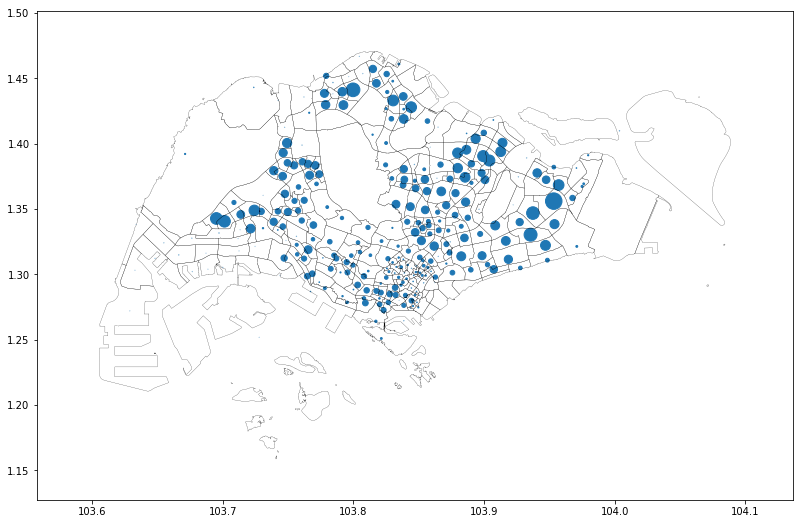

CPU times: user 12.9 s, sys: 266 ms, total: 13.2 s
Wall time: 13.3 s


In [16]:
%%time
fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(df["x_centre"], df["y_centre"], df["TOTAL"]/500)
lines = []
for rings in df["boundary"]:
    for b in rings:
        n = len(b)
        for e,_ in enumerate(b):
            lines.append([[b[e%n][0], b[e%n][1]], [b[(e+1)%n][0], b[(e+1)%n][1]]])
lc = mc.LineCollection(lines, colors="black", linewidths=0.2)
ax.add_collection(lc)
ax.autoscale()
ax.set_aspect(1)
ax.margins(0.1)
plt.show()

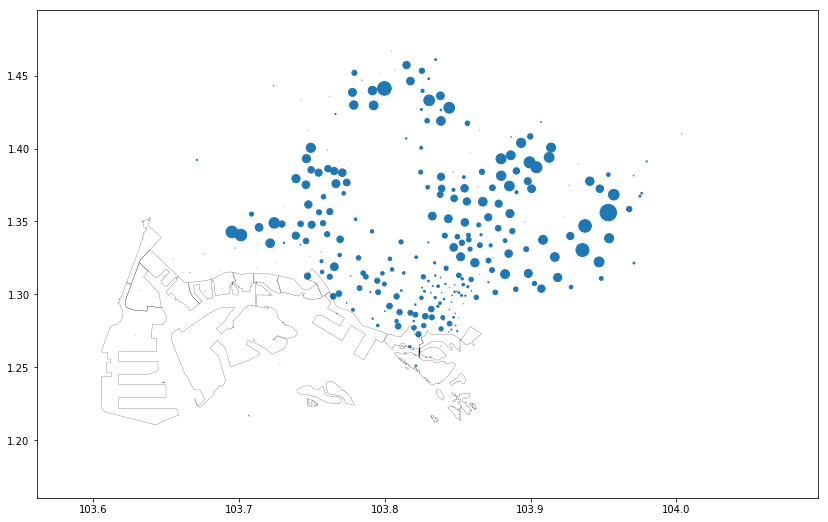

CPU times: user 416 ms, sys: 9.44 ms, total: 425 ms
Wall time: 424 ms


In [17]:
%%time
# probably should combine all these subzone into one
lst = [25,28,29,30,32,33,70,74,84,85,105,106,107,111,119,136,141,165]
fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(df["x_centre"], df["y_centre"], df["TOTAL"]/500)
lines = []
for i,rings in enumerate(df["boundary"]):
    if i+1 not in lst:
        continue
    for b in rings:
        n = len(b)
        for e,_ in enumerate(b):
            lines.append([[b[e%n][0], b[e%n][1]], [b[(e+1)%n][0], b[(e+1)%n][1]]])
lc = mc.LineCollection(lines, colors="black", linewidths=0.2)
ax.add_collection(lc)
ax.autoscale()
ax.set_aspect(1)
ax.margins(0.1)
plt.show()

## Identify adjacent subzones

In [18]:
df["adjacent"] = [[] for x in df["id"]]

In [19]:
from collections import defaultdict

d_pts = defaultdict(set)

for index, row in df.iterrows():
    for ring in row["boundary"]:
        for pt in ring:
            d_pts[(pt[0],pt[1])].add(index)

In [20]:
for index, row in df.iterrows():
    adj_set = set()
    for ring in row["boundary"]:
        for pt in ring:
            adj_set |= d_pts[(pt[0],pt[1])]    
    df.at[index, "adjacent"] = list(adj_set - {index})

In [21]:
df.sample(5)

,id,TOTAL,SUBZONE_N,PLN_AREA_N,boundary,x_centre,y_centre,adjacent
149,kml_150,14290,TAI SENG,HOUGANG,"[[[103.890038907271, 1.35090538793234, 0.0], [...",103.887473,1.343371,"[256, 193, 172, 178, 148, 183]"
208,kml_209,290,NORTHSHORE,PUNGGOL,"[[[103.912995910563, 1.42004440643633, 0.0], [...",103.907065,1.418225,"[290, 262, 265, 304, 211]"
106,kml_107,10,SHIPYARD,BOON LAY,"[[[103.697819150547, 1.30932275584607, 0.0], [...",103.688587,1.303911,"[105, 122, 69, 127]"
165,kml_166,0,AIRPORT ROAD,PAYA LEBAR,"[[[103.901432317698, 1.3561713646932, 0.0], [1...",103.898252,1.352158,"[224, 193]"
200,kml_201,39430,KAKI BUKIT,BEDOK,"[[[103.91863884426, 1.34243878528131, 0.0], [1...",103.908492,1.337452,"[96, 193, 224, 204, 174, 178, 150, 61]"


## Compute overlapping parameters

In [22]:
def compute_shared_parameter(b1,b2):
    
    d1 = set()
    d2 = set()
    
    for i,rings in enumerate([b1]):
        for b in b1:
            n = len(b)
            for e,_ in enumerate(b):
                uv = ((b[e%n][0], b[e%n][1]), (b[(e+1)%n][0], b[(e+1)%n][1]))
                d1.add((uv[0],uv[1]))
                d1.add((uv[1],uv[0]))
            
    for i,rings in enumerate([b2]):
        for b in rings:
            n = len(b)
            for e,_ in enumerate(b):
                uv = ((b[e%n][0], b[e%n][1]), (b[(e+1)%n][0], b[(e+1)%n][1]))
                d2.add((uv[0],uv[1]))
                d2.add((uv[1],uv[0]))
                
    d3 = d1.intersection(d2)
    shared = sum([((x1-x2)**2 + (y1-y2)**2)**0.5 
                  for ((x1,y1),(x2,y2)) in list(d3)])
    
    return shared/2

# example
b1 = [row for index, row in df.iterrows()][90]["boundary"]
b2 = [row for index, row in df.iterrows()][78]["boundary"]
compute_shared_parameter(b1,b2)

0.002088772885094159

In [23]:
row

id                                                      kml_323
TOTAL                                                        50
SUBZONE_N                                 NORTH-EASTERN ISLANDS
PLN_AREA_N                                NORTH-EASTERN ISLANDS
boundary      [[[104.054079567182, 1.43230625221252, 0.0], [...
x_centre                                                104.004
y_centre                                                1.40999
adjacent                                                     []
Name: 322, dtype: object

In [24]:
shared_params_col = []
for index, row in df.iterrows():
    shared_params = []
    for adj_index in row["adjacent"]:
        shared_param = compute_shared_parameter(df.at[index, "boundary"],
                                                df.at[adj_index, "boundary"])
        shared_params.append(shared_param)
    shared_params_col.append(shared_params)
df["shared_param"] = shared_params_col
df.sample(5)

,id,TOTAL,SUBZONE_N,PLN_AREA_N,boundary,x_centre,y_centre,adjacent,shared_param
220,kml_221,10,TENGAH,TENGAH,"[[[103.737563612352, 1.34650111506271, 0.0], [...",103.730850,1.360458,"[160, 163, 196, 231, 201, 169, 236, 146, 152, ...","[0.011974647911084348, 0.01114421636453867, 0...."
140,kml_141,20,TUAS BAY,TUAS,"[[[103.649747040392, 1.32036530720669, 0.0], [...",103.648101,1.312261,"[164, 241, 83, 118, 123]","[0.011663100244314847, 0.0234366022728667, 0.0..."
104,kml_105,0,JURONG PORT,JURONG EAST,"[[[103.711866723174, 1.29861361987863, 0.0], [...",103.714776,1.306431,"[98, 105, 84, 24, 127]","[0.007671147974675222, 0.006542993728330793, 0..."
267,kml_268,0,MANDAI EAST,MANDAI,"[[[103.824393496891, 1.43505486824175, 0.0], [...",103.817833,1.427891,"[320, 291, 264, 297, 266, 302, 303, 272, 209, ...","[0.00681902684423004, 0.0, 0.0, 0.0, 0.0181589..."
266,kml_267,890,NEE SOON,YISHUN,"[[[103.811111057474, 1.41527261872926, 0.0], [...",103.814631,1.406983,"[291, 264, 267, 302, 303, 255]","[0.024863405501808225, 0.020775698035664883, 0..."


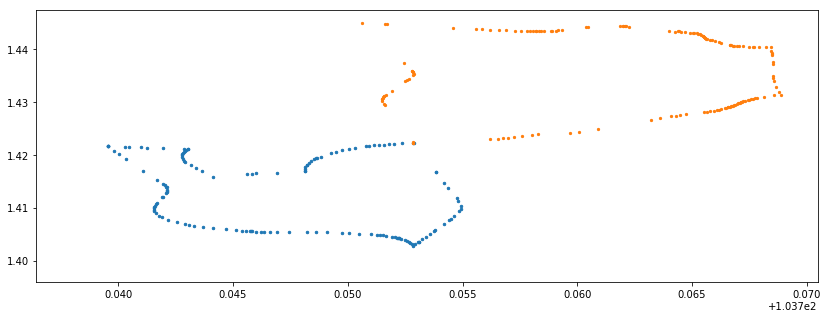

In [25]:
from collections import defaultdict
b1 = [row for index, row in df.iterrows()][300]["boundary"]
b2 = [row for index, row in df.iterrows()][273]["boundary"]
plt.figure(figsize=(14,5))
plt.scatter([x for x,_,_ in b1[0]],
            [y for _,y,_ in b1[0]], s=6)            
plt.scatter([x for x,_,_ in b2[0]],
            [y for _,y,_ in b2[0]], s=5)
plt.show()

## Plot graph

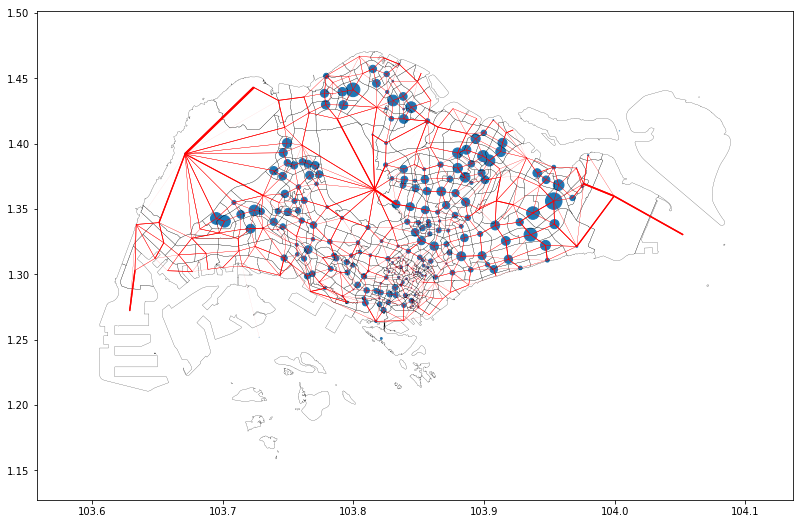

In [26]:
# %%time
fig, ax = plt.subplots(figsize=(14,9))

# plot population mass
plt.scatter(df["x_centre"], df["y_centre"], df["TOTAL"]/500)
lines = []

# plot subzone boundaries
for i,rings in enumerate(df["boundary"]):
    for b in rings:
        n = len(b)
        for e,_ in enumerate(b):
            lines.append([[b[e%n][0], b[e%n][1]], [b[(e+1)%n][0], b[(e+1)%n][1]]])
lc = mc.LineCollection(lines, colors="black", linewidths=0.2)
ax.add_collection(lc)

# plot connecting subzones
lines_adj = []
linewidths = []
for i,(adjacent,shared_param) in enumerate(zip(df["adjacent"], df["shared_param"])):
    for adj,par in zip(adjacent,shared_param):
        if par == 0: continue
        lines_adj.append([[df["x_centre"][i], df["y_centre"][i]], 
                          [df["x_centre"][adj], df["y_centre"][adj]]])
        linewidths.append(par*30)
lc_adj = mc.LineCollection(lines_adj, colors="red", linewidths=linewidths)
ax.add_collection(lc_adj)

ax.autoscale()
ax.set_aspect(1)
ax.margins(0.1)
plt.show()

## Adjacency matrix

In [27]:
matrix = np.zeros((df.shape[0],df.shape[0]))
for i,(adjacent,shared_param) in enumerate(zip(df["adjacent"], df["shared_param"])):
    for adj,par in zip(adjacent,shared_param):
        matrix[i,adj] = np.log(par+0.00001) + np.log(1+df["TOTAL"][i]*df["TOTAL"][adj])

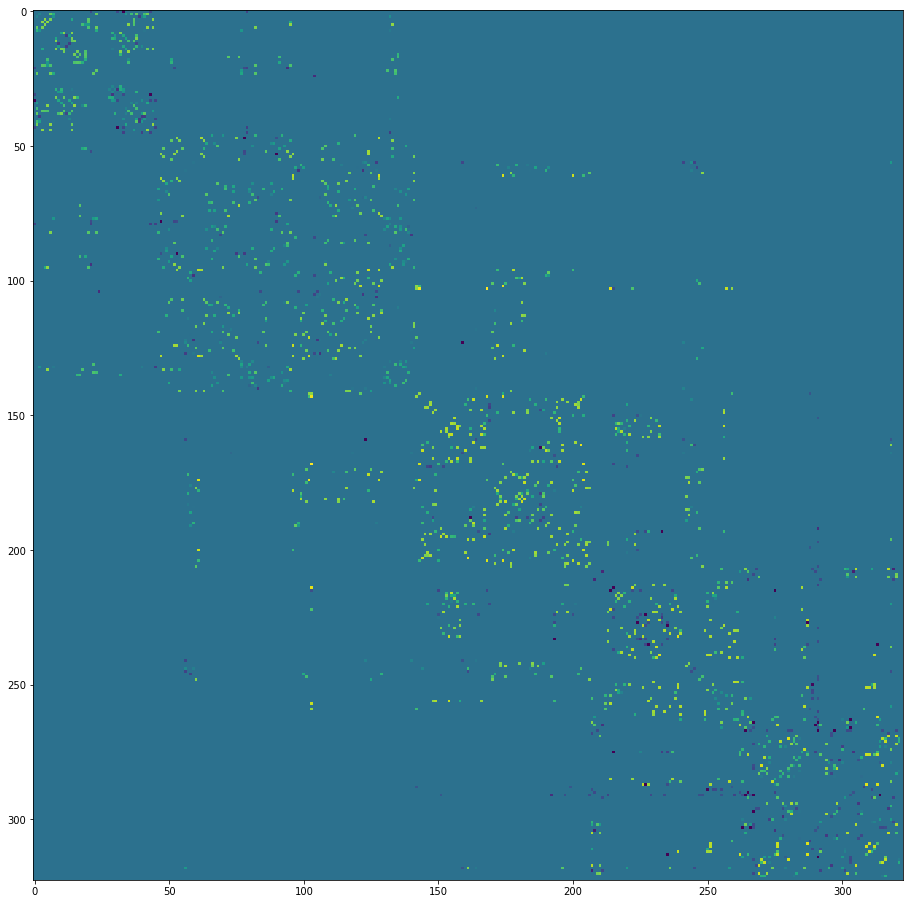

In [28]:
fig, ax = plt.subplots(figsize=(16,16))
ax = plt.imshow(matrix)
plt.show()